Decision tree

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import collections 
from sklearn.tree import DecisionTreeClassifier
iris_dataset = load_iris()
X=iris_dataset['data'][:,[1,2]]
X_train, X_test, y_train, y_test = train_test_split(X, iris_dataset['target'],test_size=0.3, random_state=0)

In [2]:
class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """

    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose

    def fit(self, X, y):
        self.gain = 0
        for feature_index in range(X.shape[1]):
            self.thresholds = np.unique(X[:,feature_index])
            for threshold in self.thresholds:
                _gain = self._calc_ig(X,feature_index,y,threshold)
                if _gain > self.gain:
                    self.l_label = collections.Counter(y[X[:,feature_index] < threshold]).most_common()[0][0]
                    self.r_label = collections.Counter(y[X[:,feature_index] >= threshold]).most_common()[0][0]
                    self.feature = feature_index
                    self.threshold = threshold
                    self.gain = _gain
                    if self.verbose:
                        print('feature',self.feature,'threshold',self.threshold,'gain',self.gain)

    def predict(self, X):
        prediction = np.where(X[:,self.feature] < self.threshold,self.l_label,self.r_label)
        return prediction

    def _calc_gini(self,y):
        labels,counts = np.unique(y,return_counts=True)
        _gini = 0
        for label in labels:
            _gini += (counts[labels==label]/np.sum(counts))**2
        gini = 1 - _gini
        return gini

    def _calc_ig(self,X,feature_index,y,threshold):
        labels_l = y[X[:,feature_index] < threshold]
        labels_r = y[X[:,feature_index] >= threshold]
        gain_l = (len(labels_l)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_l)
        gain_r = (len(labels_r)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_r)
        gain = self._calc_gini(y) -gain_l -gain_r
        return gain

In [3]:
clf = ScratchDecesionTreeClassifierDepth1(verbose = True)
clf.fit(X_train,y_train)

feature 0 threshold 2.2 gain [0.00698238]
feature 0 threshold 2.4 gain [0.01197554]
feature 0 threshold 2.5 gain [0.03157029]
feature 0 threshold 2.6 gain [0.03735397]
feature 0 threshold 2.7 gain [0.04052801]
feature 0 threshold 2.8 gain [0.05123286]
feature 0 threshold 2.9 gain [0.06191928]
feature 0 threshold 3.0 gain [0.08613442]
feature 0 threshold 3.1 gain [0.0892875]
feature 1 threshold 1.5 gain [0.12369844]
feature 1 threshold 1.6 gain [0.22645426]
feature 1 threshold 1.7 gain [0.28824661]
feature 1 threshold 3.0 gain [0.32949954]


In [4]:
train_prediction = clf.predict(X_train)
print(X_train)

[[2.  3.5]
 [3.  5.5]
 [3.3 5.7]
 [2.2 5. ]
 [2.5 5.8]
 [2.5 3.9]
 [3.  6.1]
 [3.3 4.7]
 [2.4 3.8]
 [2.7 4.9]
 [2.8 5.1]
 [2.5 4.5]
 [2.5 5. ]
 [3.2 4.7]
 [3.  5.2]
 [3.4 4.5]
 [3.1 1.6]
 [2.7 5.1]
 [2.7 4.2]
 [2.9 3.6]
 [2.5 4. ]
 [3.  4.6]
 [3.2 6. ]
 [3.7 1.5]
 [3.  1.1]
 [2.7 5.3]
 [3.  4.2]
 [3.4 1.7]
 [4.4 1.5]
 [3.1 4.9]
 [3.1 1.5]
 [3.  5.1]
 [2.5 3. ]
 [3.4 1.4]
 [2.2 4.5]
 [3.6 6.1]
 [2.9 4.2]
 [3.  1.4]
 [3.  5.9]
 [3.2 5.7]
 [3.  5.8]
 [2.8 5.6]
 [3.8 1.6]
 [3.4 1.6]
 [3.2 5.1]
 [3.3 5.7]
 [2.3 1.3]
 [3.4 5.4]
 [3.  1.4]
 [2.5 5. ]
 [3.1 5.4]
 [3.2 1.3]
 [3.6 1.4]
 [3.  5.8]
 [3.5 1.4]
 [3.  1.3]
 [3.9 1.7]
 [2.3 4. ]
 [3.2 5.9]
 [3.  6.6]
 [3.5 1.4]
 [3.1 1.5]
 [3.4 1.4]
 [2.8 4.5]
 [3.  4.4]
 [3.2 1.2]
 [3.3 1.7]
 [2.9 4.3]
 [3.4 1.5]
 [2.6 6.9]
 [2.4 3.3]
 [3.8 6.4]
 [3.1 4.4]
 [4.1 1.5]
 [3.  4.8]
 [4.  1.2]
 [2.8 6.7]
 [3.8 1.5]
 [3.2 1.6]
 [2.8 6.1]
 [3.3 1.4]
 [3.4 5.6]
 [2.8 4.1]
 [2.7 3.9]
 [2.6 3.5]
 [3.2 5.3]
 [3.  5.2]
 [2.5 4.9]
 [3.  5. ]
 [3.  1.6]
 [2.4 3.7]

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, train_prediction)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
p_score = precision_score(y_train, train_prediction, average='micro')
r_score = recall_score(y_train, train_prediction, average='micro')
print(p_score, r_score, sep="\n")

0.6952380952380952
0.6952380952380952


mesh shape:[[2.2  1.  ]
 [2.21 1.  ]
 [2.22 1.  ]
 ...
 [4.17 6.29]
 [4.18 6.29]
 [4.19 6.29]]


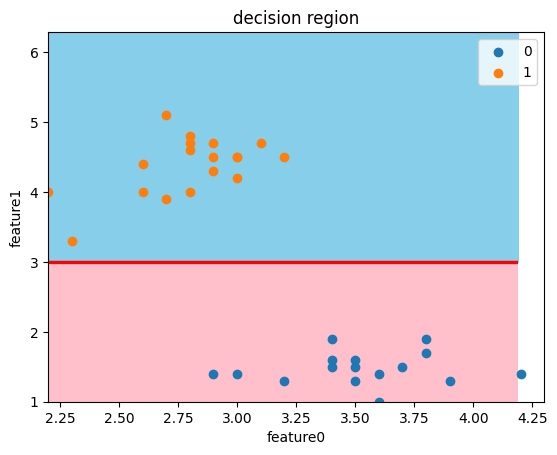

In [6]:
import matplotlib.colors
import matplotlib.pyplot as plt

def decision_region(X,y,slr):
    mesh_f0, mesh_f1  = np.meshgrid(
        np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.01), 
        np.arange(np.min(X[:,1]), np.max(X[:,1]), 0.01)
    )
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    print("mesh shape:{}".format(mesh))
    y_pred = slr.predict(mesh).reshape(mesh_f0.shape)
    plt.title('decision region')
    plt.xlabel('feature0')
    plt.ylabel('feature1')
    plt.contourf(mesh_f0, mesh_f1, y_pred,cmap=matplotlib.colors.ListedColormap(['pink', 'skyblue']))
    plt.contour(mesh_f0, mesh_f1, y_pred,colors='red')
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1],label='0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1],label='1')
    plt.legend()
    plt.show()

decision_region(X_test, y_test, clf)
